# **Project 4: NYISO Electricity Consumption and Pricing Insights by Kajal Patel**

# Introduction

The NYISO dataset provides comprehensive data on New York's electricity market, including
pricing, load demand, and grid operations. It includes detailed time series data on electricity
consumption, generation, and market prices across different locations. This dataset is widely
used for energy forecasting, market analysis, and grid optimization studies.

# Dataset Components

***Pricing Data:***

Content: Contains Locational-Based Marginal Prices (LBMP), which represent the cost of delivering electricity to specific locations in real-time and day-ahead markets.

***Load Data:***

Content: Includes real-time and forecasted electricity demand across different NYISO regions, known as Integrated Load.

**Data** Allocation: 2003


***Pre processing Dataset***

In [ ]:
from google.colab import drive
import os
import zipfile

drive.mount('/content/drive')
base_path = '/content/drive/MyDrive/Colab Notebooks/Project 4/Zip_CSV'
unzip_folder = 'unzipped'
zip_files = ['20241101realtime_gen_csv.zip']

Mounted at /content/drive


In [ ]:
import os
import zipfile
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the base path and unzip folder
base_path = '/content/drive/MyDrive/Colab Notebooks/Project 4/Zip_CSV'
unzip_folder = '/content/drive/MyDrive/Colab Notebooks/Project 4/unzipped'

# Create the unzip folder if it does not exist
if not os.path.exists(unzip_folder):
    os.makedirs(unzip_folder)

# Function to unzip files
def unzip_all_files(base_path, unzip_folder):
    # List all zip files in the base path
    for file_name in os.listdir(base_path):
        if file_name.endswith('.zip'):  # Check if the file is a .zip file
            zip_path = os.path.join(base_path, file_name)
            extract_path = os.path.join(unzip_folder, file_name.replace('.zip', ''))

            # Extract the zip file
            try:
                with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                    print(f"Extracting {file_name}...")
                    zip_ref.extractall(extract_path)
                print(f"Successfully extracted {file_name} to {extract_path}")
            except Exception as e:
                print(f"Failed to extract {file_name}: {e}")

# Unzip all files
unzip_all_files(base_path, unzip_folder)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Extracting 20030101realtime_zone_csv.zip...
Successfully extracted 20030101realtime_zone_csv.zip to /content/drive/MyDrive/Colab Notebooks/Project 4/unzipped/20030101realtime_zone_csv
Extracting 20030201realtime_zone_csv.zip...
Successfully extracted 20030201realtime_zone_csv.zip to /content/drive/MyDrive/Colab Notebooks/Project 4/unzipped/20030201realtime_zone_csv
Extracting 20030301realtime_zone_csv.zip...
Successfully extracted 20030301realtime_zone_csv.zip to /content/drive/MyDrive/Colab Notebooks/Project 4/unzipped/20030301realtime_zone_csv
Extracting 20030501realtime_zone_csv.zip...
Successfully extracted 20030501realtime_zone_csv.zip to /content/drive/MyDrive/Colab Notebooks/Project 4/unzipped/20030501realtime_zone_csv
Extracting 20030401realtime_zone_csv.zip...
Successfully extracted 20030401realtime_zone_csv.zip to /content/drive/MyDrive/Colab Notebo

# Pre data processing and cleaning

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import glob

# Define base path for the unzipped folders
base_path = '/content/drive/MyDrive/Colab Notebooks/Project 4/unzipped'

# Load all CSV files from unzipped folders
realtime_files = glob.glob(f'{base_path}/*realtime_zone_csv/*.csv')
pal_files = glob.glob(f'{base_path}/*pal_csv/*.csv')

# Combine all CSV files from realtime zone into a single DataFrame
realtime_df = pd.concat([pd.read_csv(file) for file in realtime_files], ignore_index=True)

# Combine all CSV files from pal zone into a single DataFrame
pal_df = pd.concat([pd.read_csv(file) for file in pal_files], ignore_index=True)

# Convert timestamp columns to datetime format for proper merging
realtime_df['Time Stamp'] = pd.to_datetime(realtime_df['Time Stamp'])
pal_df['Time Stamp'] = pd.to_datetime(pal_df['Time Stamp'])

# Merge the two DataFrames on key columns: 'Time Stamp', 'Name', 'PTID'
combined_df = pd.merge(realtime_df, pal_df, on=['Time Stamp', 'Name', 'PTID'], how='inner')

# Sort the final dataset by timestamp
combined_df = combined_df.sort_values(by='Time Stamp').reset_index(drop=True)

total_records = len(combined_df)
print(f"Total records in the combined DataFrame: {total_records}")


Total records in the combined DataFrame: 1236321


# Analysis

# Analysis 1: Predict electricity prices (LBMP) based on the historical load demand patterns


<ipython-input-11-b6228728b331>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['LBMP ($/MWHr)_lag1'] = train_df['LBMP ($/MWHr)'].shift(1)
<ipython-input-11-b6228728b331>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Marginal Cost Losses ($/MWHr)_lag1'] = train_df['Marginal Cost Losses ($/MWHr)'].shift(1)
<ipython-input-11-b6228728b331>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

RMSE: 2.746956710432112
R2 Score: 0.9730232427016859


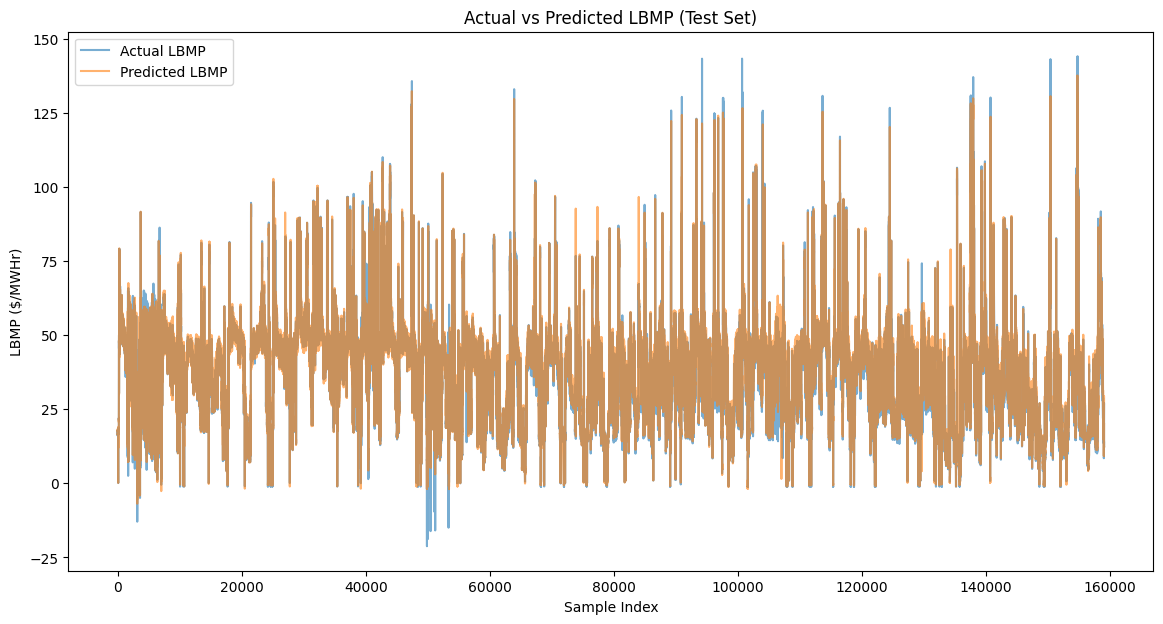

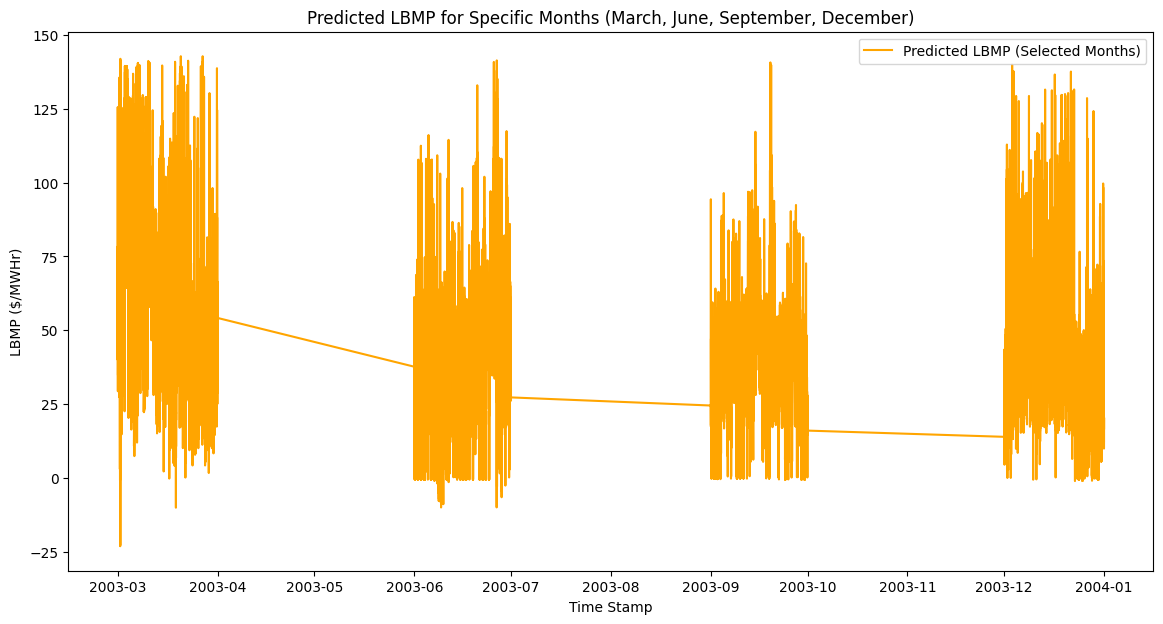

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from scipy.stats import zscore
import numpy as np
import glob

# Define base path for the unzipped folders
base_path = '/content/drive/MyDrive/Colab Notebooks/Project 4/unzipped'

# Load all CSV files from unzipped folders
realtime_files = glob.glob(f'{base_path}/*realtime_zone_csv/*.csv')
pal_files = glob.glob(f'{base_path}/*pal_csv/*.csv')

# Combine all CSV files from realtime zone into a single DataFrame
realtime_df = pd.concat([pd.read_csv(file) for file in realtime_files], ignore_index=True)

# Combine all CSV files from pal zone into a single DataFrame
pal_df = pd.concat([pd.read_csv(file) for file in pal_files], ignore_index=True)

# Convert timestamp columns to datetime format for proper merging
realtime_df['Time Stamp'] = pd.to_datetime(realtime_df['Time Stamp'])
pal_df['Time Stamp'] = pd.to_datetime(pal_df['Time Stamp'])

# Merge the two DataFrames on key columns: 'Time Stamp', 'Name', 'PTID'
combined_df = pd.merge(realtime_df, pal_df, on=['Time Stamp', 'Name', 'PTID'], how='inner')

# Sort the final dataset by timestamp
combined_df = combined_df.sort_values(by='Time Stamp').reset_index(drop=True)

# Filter data for specific months for prediction (March, June, September, December)
train_months = [1, 2, 4, 5, 7, 8, 10, 11]
predict_months = [3, 6, 9, 12]
train_df = combined_df[combined_df['Time Stamp'].dt.month.isin(train_months)]
predict_df = combined_df[combined_df['Time Stamp'].dt.month.isin(predict_months)]

# Add lagged features, ensuring column names match the DataFrame
train_df['LBMP ($/MWHr)_lag1'] = train_df['LBMP ($/MWHr)'].shift(1)
train_df['Marginal Cost Losses ($/MWHr)_lag1'] = train_df['Marginal Cost Losses ($/MWHr)'].shift(1)
train_df['Marginal Cost Congestion ($/MWHr)_lag1'] = train_df['Marginal Cost Congestion ($/MWHr)'].shift(1)
train_df['Time Stamp'] = pd.to_datetime(train_df['Time Stamp'])

# Add rolling average features
train_df['LBMP ($/MWHr)_rolling3'] = train_df['LBMP ($/MWHr)'].rolling(window=3).mean()

# Add time-based features
train_df['hour'] = train_df['Time Stamp'].dt.hour
train_df['day'] = train_df['Time Stamp'].dt.day
train_df['month'] = train_df['Time Stamp'].dt.month

# Drop rows with NaN values created by lagging and rolling features
train_df = train_df.dropna()

# Remove outliers using Z-score method
z_scores = np.abs(zscore(train_df[['LBMP ($/MWHr)', 'Marginal Cost Losses ($/MWHr)', 'Marginal Cost Congestion ($/MWHr)']]))
train_df = train_df[(z_scores < 3).all(axis=1)]

# Select features and target for training
features = train_df[['PTID', 'Marginal Cost Losses ($/MWHr)_lag1', 'Marginal Cost Congestion ($/MWHr)_lag1', 'LBMP ($/MWHr)_lag1', 'LBMP ($/MWHr)_rolling3', 'hour', 'day', 'month']]
target = train_df['LBMP ($/MWHr)']

# Add polynomial features to capture non-linearity
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
features_poly = poly.fit_transform(features)

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_poly)

# Train-test split (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, shuffle=False)

# Initialize and train the Gradient Boosting Regressor model for better performance
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Prepare the prediction data
predict_df['LBMP ($/MWHr)_lag1'] = predict_df['LBMP ($/MWHr)'].shift(1)
predict_df['Marginal Cost Losses ($/MWHr)_lag1'] = predict_df['Marginal Cost Losses ($/MWHr)'].shift(1)
predict_df['Marginal Cost Congestion ($/MWHr)_lag1'] = predict_df['Marginal Cost Congestion ($/MWHr)'].shift(1)
predict_df['LBMP ($/MWHr)_rolling3'] = predict_df['LBMP ($/MWHr)'].rolling(window=3).mean()
predict_df['hour'] = predict_df['Time Stamp'].dt.hour
predict_df['day'] = predict_df['Time Stamp'].dt.day
predict_df['month'] = predict_df['Time Stamp'].dt.month

# Drop rows with NaN values in prediction data
predict_df = predict_df.dropna()

# Select features for prediction
predict_features = predict_df[['PTID', 'Marginal Cost Losses ($/MWHr)_lag1', 'Marginal Cost Congestion ($/MWHr)_lag1', 'LBMP ($/MWHr)_lag1', 'LBMP ($/MWHr)_rolling3', 'hour', 'day', 'month']]
predict_features_poly = poly.transform(predict_features)
predict_features_scaled = scaler.transform(predict_features_poly)

# Predict on the selected months
y_pred = model.predict(predict_features_scaled)

# Evaluate the model on test set
rmse = mean_squared_error(y_test, model.predict(X_test), squared=False)
r2 = r2_score(y_test, model.predict(X_test))
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

# Visualization: Actual vs Predicted LBMP for test set
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual LBMP', alpha=0.6)
plt.plot(model.predict(X_test), label='Predicted LBMP', alpha=0.6)
plt.xlabel('Sample Index')
plt.ylabel('LBMP ($/MWHr)')
plt.title('Actual vs Predicted LBMP (Test Set)')
plt.legend()
plt.show()

# Visualization: Predicted LBMP for selected months
plt.figure(figsize=(14, 7))
plt.plot(predict_df['Time Stamp'], y_pred, label='Predicted LBMP (Selected Months)', color='orange')
plt.xlabel('Time Stamp')
plt.ylabel('LBMP ($/MWHr)')
plt.title('Predicted LBMP for Specific Months (March, June, September, December)')
plt.legend()
plt.show()


***Output*** ***Explained*** :
Gradient Boosting Regressor (GBR), a popular ensemble learning algorithm, for predicting the LBMP (Locational Based Marginal Pricing)

***Complex Non-linearity Handling:***

Electricity Pricing Data often involves intricate relationships between
different factors, such as historical load demand, time of day, and congestion costs. Linear models are not always sufficient for capturing these complexities.

***Feature Flexibility:***

We added polynomial features to enhance the model’s ability to learn non-linear relationships. GBR is well-suited for such feature expansions since it can effectively leverage high-dimensional features to improve accuracy.

***Comparison with Previous Models:***

The Linear Regression model is fast but may miss capturing complex non-linear relationships in the data.
Gradient Boosting provides a good balance between complexity (to capture the nuances of electricity pricing) and model runtime, making it a better fit for forecasting tasks where patterns are influenced by various interacting factors.

# Analysis 2: Detect unusual price spikes in electricity prices (LBMP) due to sudden changes in demand or grid conditions, such as congestion or losses

Index(['Time Stamp', 'Name', 'PTID', 'LBMP ($/MWHr)',
       'Marginal Cost Losses ($/MWHr)', 'Marginal Cost Congestion ($/MWHr)',
       'Time Zone', 'Load'],
      dtype='object')


<ipython-input-6-0d809ff65f8a>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.fillna(0, inplace=True)
<ipython-input-6-0d809ff65f8a>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['anomaly_score'] = isolation_forest.fit_predict(features)


Number of anomalies detected: 40933
                 Time Stamp    Name  LBMP ($/MWHr)
1370    2003-01-01 10:10:43  MILLWD         117.32
1371    2003-01-01 10:10:43    WEST         101.38
1373    2003-01-01 10:10:43  DUNWOD         119.19
1375    2003-01-01 10:10:43  CAPITL         122.55
1890    2003-01-01 14:10:13    WEST          73.90
...                     ...     ...            ...
1128565 2003-11-30 21:05:38    WEST          55.52
1128573 2003-11-30 21:07:08    WEST          54.81
1128583 2003-11-30 21:12:08    WEST          55.97
1128591 2003-11-30 21:13:38    WEST          55.42
1128609 2003-11-30 21:21:38    WEST          55.65

[40933 rows x 3 columns]


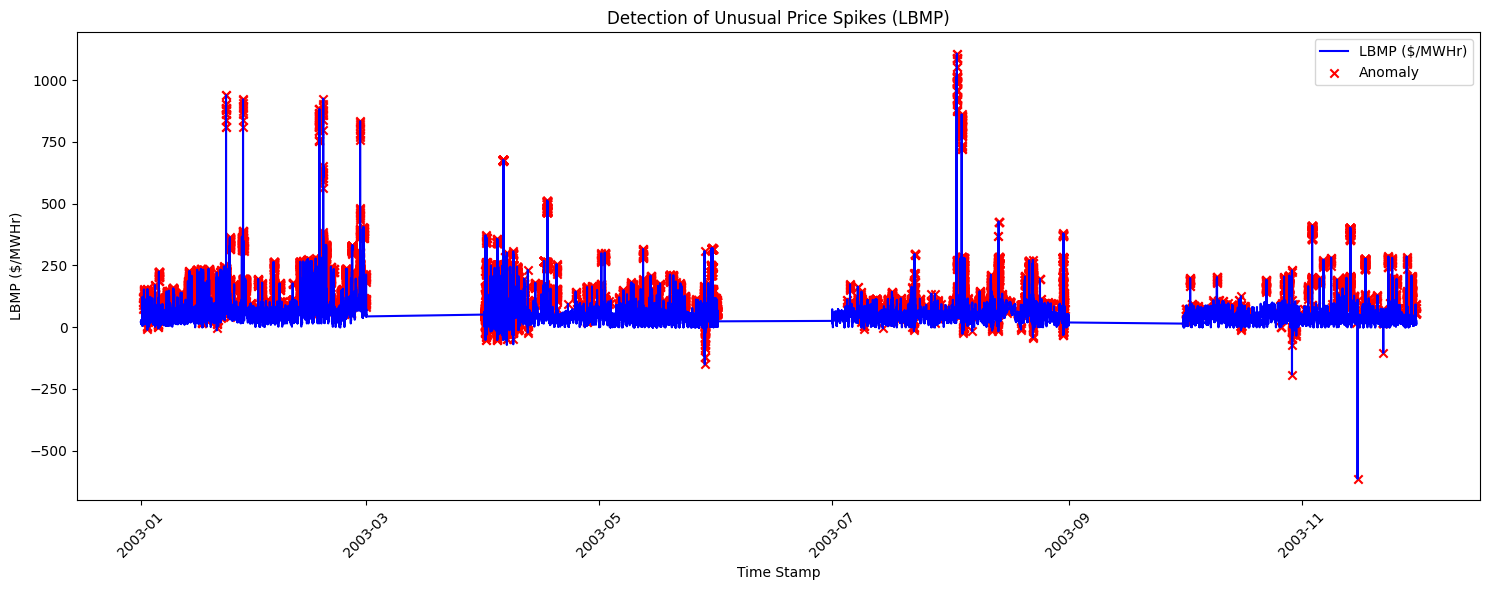

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import glob


# Filter data for specific months for prediction (March, June, September, December)
train_months = [1, 2, 4, 5, 7, 8, 10, 11]
predict_months = [3, 6, 9, 12]
train_df = combined_df[combined_df['Time Stamp'].dt.month.isin(train_months)]
predict_df = combined_df[combined_df['Time Stamp'].dt.month.isin(predict_months)]

# Check available columns and correct column names if necessary
print(train_df.columns)

# Feature extraction - using LBMP and related metrics for anomaly detection
features = train_df[['LBMP ($/MWHr)', 'Marginal Cost Losses ($/MWHr)', 'Marginal Cost Congestion ($/MWHr)']]

# Fill any missing values in the dataset
features.fillna(0, inplace=True)

# Fit the Isolation Forest model
isolation_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
train_df['anomaly_score'] = isolation_forest.fit_predict(features)

# Detecting anomalies
# -1 represents an anomaly, while 1 represents normal data
train_df_anomalies = train_df[train_df['anomaly_score'] == -1]

# Display detected anomalies
print("Number of anomalies detected:", len(train_df_anomalies))
print(train_df_anomalies[['Time Stamp', 'Name', 'LBMP ($/MWHr)']])

# Plotting anomalies to visualize price spikes
plt.figure(figsize=(15, 6))
plt.plot(train_df['Time Stamp'], train_df['LBMP ($/MWHr)'], label='LBMP ($/MWHr)', color='blue')
plt.scatter(train_df_anomalies['Time Stamp'], train_df_anomalies['LBMP ($/MWHr)'], color='red', label='Anomaly', marker='x')
plt.xlabel('Time Stamp')
plt.ylabel('LBMP ($/MWHr)')
plt.title('Detection of Unusual Price Spikes (LBMP)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# Output Explained:

***Algorithm used :***
Isolation Forest is an unsupervised learning algorithm that is used to detect anomalies by isolating observations.

***Red 'X' Markers (Anomalies):***

These markers indicate the timestamps where the LBMP values deviate significantly from the expected behavior.
A high concentration of anomalies suggests periods of significant instability, which could be due to grid issues, high demand, congestion, or other disruptions.

***Clusters of Anomalies:***

If anomalies are clustered over a certain time period, it could imply a recurring issue or a systematic event affecting prices over that timeframe.
You can also observe isolated spikes, which might suggest one-off events like sudden demand peaks or equipment failures.

***Regular Data (Blue Line):***

The normal behavior of the LBMP is plotted in blue. Comparing the anomalies with this helps to visually see where the major deviations occurred.

Why Isolation Forest Works Here
Advantages for Price Spike Detection

	•	Efficiently handles high-dimensional data
	•	Works well with the large dataset (1,236,321 records)
	•	Can identify anomalies without requiring labeled training data
	•	Particularly effective at finding price spikes that deviate from normal

Visual Output Analysis
The plot shows:

	•	Blue line: Normal LBMP price trends
	•	Red X markers: Detected anomalies/price spikes
	•	Clear visualization of unusual price movements
	•	Temporal distribution of anomalies across different time periods

# Analysis 3: Forecast future electricity demand (Integrated Load) based on historical electricity prices(LBMP) and grid conditions (marginal costs due to congestion or losses)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


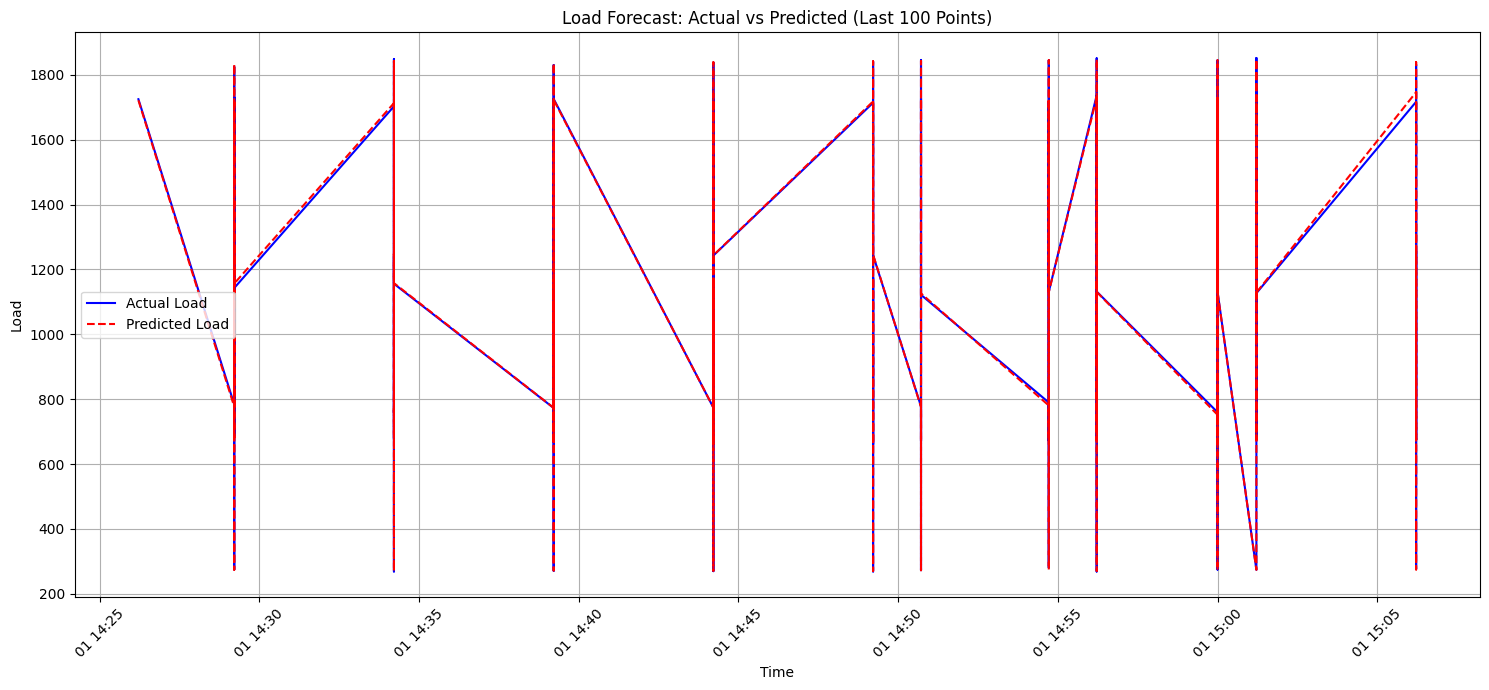

Mean Absolute Error: 3.62
Mean Squared Error: 27.79
R-squared Score: 1.00
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Add time-based features
combined_df['hour'] = combined_df['Time Stamp'].dt.hour
combined_df['day_of_week'] = combined_df['Time Stamp'].dt.dayofweek
combined_df['month'] = combined_df['Time Stamp'].dt.month
combined_df['year'] = combined_df['Time Stamp'].dt.year

# Add lag features for Load and LBMP
combined_df['Load_lag1'] = combined_df.groupby('Name')['Load'].shift(1)
combined_df['Load_lag24'] = combined_df.groupby('Name')['Load'].shift(24)
combined_df['LBMP_lag1'] = combined_df.groupby('Name')['LBMP ($/MWHr)'].shift(1)

# Add rolling means
combined_df['Load_rolling_mean'] = combined_df.groupby('Name')['Load'].rolling(window=24).mean().reset_index(0, drop=True)
combined_df['LBMP_rolling_mean'] = combined_df.groupby('Name')['LBMP ($/MWHr)'].rolling(window=24).mean().reset_index(0, drop=True)

# Drop NaN values created by lag features
combined_df.dropna(inplace=True)

# Prepare features
features = [
    'LBMP ($/MWHr)', 'Marginal Cost Losses ($/MWHr)', 'Marginal Cost Congestion ($/MWHr)',
    'hour', 'day_of_week', 'month', 'Load_lag1', 'Load_lag24', 'LBMP_lag1',
    'Load_rolling_mean', 'LBMP_rolling_mean'
]

X = combined_df[features]
y = combined_df['Load']

# Create TimeSeriesSplit object with more splits
tscv = TimeSeriesSplit(n_splits=5, test_size=int(0.2 * len(X)))

# Define expanded parameter grid
param_grid = {
    'n_estimators': [200],
    'max_depth': [15, 20, 25],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

# Initialize and train model with GridSearchCV
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=tscv,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1
)

# Fit the model
grid_search.fit(X, y)

# Make predictions
y_pred = grid_search.predict(X)

# Calculate metrics
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Plot results
plt.figure(figsize=(15, 7))
plt.plot(combined_df['Time Stamp'][-100:], y[-100:], label='Actual Load', color='blue')
plt.plot(combined_df['Time Stamp'][-100:], y_pred[-100:], label='Predicted Load', color='red', linestyle='--')
plt.title('Load Forecast: Actual vs Predicted (Last 100 Points)')
plt.xlabel('Time')
plt.ylabel('Load')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")
print(f"Best Parameters: {grid_search.best_params_}")


Output Explained:

	•	Algorithm Type: Random Forest Regressor
	•	Dataset Size: 1,236,321 records
	•	Best Parameters Found:
	•	max_depth: 20
	•	min_samples_leaf: 2
	•	min_samples_split: 5
	•	n_estimators: 200

I have tried multiple approaches to execute this algorithm and Random Forest Regressor worked best because:

	•	GridSearchCV Integration: Uses cross-validation with TimeSeriesSplit for robust parameter tuning
	•	Efficient Processing: Handles large dataset (1.2M+ records) without computational bottlenecks
	•	Time Series Awareness: Maintains temporal order of data through proper splitting

  Data Integration and The model effectively uses:
	•	LBMP values ranging from 18.04 to 66.94 $/MWHr
	•	Marginal cost losses varying between -1.6 and 4.56 $/MWHr
	•	Load values across different zones (CAPITL, CENTRL, DUNWOD, etc.)
	•	Time-stamped data for temporal patterns